# MILESTONE 1: MACHINE LEARNING

By: Naomi Amelia

# Objective

The objective of this assignment is to predict the default payment next month using selected machine learning: logistic regression, support vector machine (SVM), decision tree, random forest, K-nearest Neighbors (KNN), Naive Bayes and AdaBoost

# Importing Libraries

In [34]:
# Define Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import phik

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)

# For EDA
from statistics import mode

# For Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestRegressor


# For Feature Scaling
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler

# Split Dataset and Standarize the Datasets
from sklearn.model_selection import train_test_split

# Calculate the Variance Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Split between Train-Set and Test-Set
from sklearn.model_selection import train_test_split

# For Feature Selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold


# To Evaluate Regression Model
from sklearn import metrics
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix, roc_auc_score
from sklearn.metrics import plot_confusion_matrix



# Data Loading 

In this section I will load the dataset using SQL in the googgle big query.

The query that I used to extract the dataset is:

`SELECT limit_balance, sex, education_level, marital_status, age, pay_0, pay_2, pay_3, pay_4, pay_5, pay_6, bill_amt_1, bill_amt_2, bill_amt_3, bill_amt_4, bill_amt_5, bill_amt_6, pay_amt_1, pay_amt_2, pay_amt_3, pay_amt_4, pay_amt_5, pay_amt_6, default_payment_next_month 
FROM `bigquery-public-data.ml_datasets.credit_card_default` 
LIMIT 29955`


In [35]:
df = pd.read_csv('h8dsft_P1M1_Naomi-Amelia.csv')
df.head()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,50000,1,1,2,39,0,0,0,0,0,...,50803,30789,15874,1800,2000,3000,2000,2000,2000,0
1,110000,2,1,2,29,0,0,0,0,0,...,32489,26354,20221,2000,2010,3000,3000,3000,1000,0
2,270000,1,1,2,36,0,0,0,2,0,...,40335,37165,22156,10076,4018,14,2051,2000,0,0
3,130000,1,1,1,45,0,0,0,0,0,...,62377,63832,65099,2886,2908,2129,2354,2366,2291,0
4,50000,1,1,2,24,0,0,0,0,0,...,19837,19855,20151,1367,1606,692,709,721,692,0


In [36]:
df.tail()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2960,210000,2,2,1,39,-1,-1,-1,-1,-2,...,0,0,12000,0,28428,0,0,12000,33664,0
2961,280000,2,1,1,41,2,-1,-1,-1,-2,...,0,0,244,6859,486,0,0,244,0,0
2962,80000,1,1,2,28,1,-1,-1,-1,-2,...,0,0,0,47,207,0,0,0,0,0
2963,200000,1,2,1,53,1,-1,-1,-2,-2,...,0,0,6753,2920,0,0,0,6753,0,1
2964,20000,2,1,2,24,-1,-1,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0


# Exploratory Data Analysis

## Checking Data Type for each columns

In [37]:
df.dtypes

limit_balance                 int64
sex                           int64
education_level               int64
marital_status                int64
age                           int64
pay_0                         int64
pay_2                         int64
pay_3                         int64
pay_4                         int64
pay_5                         int64
pay_6                         int64
bill_amt_1                    int64
bill_amt_2                    int64
bill_amt_3                    int64
bill_amt_4                    int64
bill_amt_5                    int64
bill_amt_6                    int64
pay_amt_1                     int64
pay_amt_2                     int64
pay_amt_3                     int64
pay_amt_4                     int64
pay_amt_5                     int64
pay_amt_6                     int64
default_payment_next_month    int64
dtype: object

We can see that the data is all in integer type which means the columns are already encoded. 

## Data Cleaning

In [38]:
df.isnull().sum()

limit_balance                 0
sex                           0
education_level               0
marital_status                0
age                           0
pay_0                         0
pay_2                         0
pay_3                         0
pay_4                         0
pay_5                         0
pay_6                         0
bill_amt_1                    0
bill_amt_2                    0
bill_amt_3                    0
bill_amt_4                    0
bill_amt_5                    0
bill_amt_6                    0
pay_amt_1                     0
pay_amt_2                     0
pay_amt_3                     0
pay_amt_4                     0
pay_amt_5                     0
pay_amt_6                     0
default_payment_next_month    0
dtype: int64

We can see that there are no normal missing values in the data, we will further see the data by using describe.

In [39]:
df.describe()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
count,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,...,2965.000000,2965.000000,2965.000000,2965.000000,2.965000e+03,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000
mean,163369.308600,1.607757,1.849578,1.559865,35.193255,0.005059,-0.122428,-0.141653,-0.185160,-0.225295,...,44089.683305,40956.080607,39773.072513,6348.902867,6.272494e+03,5150.497133,4561.376054,4913.286678,5382.701518,0.214165
std,125030.415472,0.488333,0.778184,0.522317,9.109439,1.114395,1.180784,1.183630,1.178322,1.159003,...,61907.454056,58271.904751,57303.488981,20885.735336,2.887967e+04,14287.079982,13281.499599,16734.340778,17275.953029,0.410311
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-46627.000000,-46627.000000,-73895.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2582.000000,1958.000000,1430.000000,1013.000000,9.900000e+02,477.000000,313.000000,323.000000,173.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19894.000000,18814.000000,18508.000000,2234.000000,2.175000e+03,1994.000000,1600.000000,1646.000000,1615.000000,0.000000
75%,230000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58622.000000,53373.000000,52287.000000,5087.000000,5.000000e+03,4500.000000,4000.000000,4021.000000,4081.000000,0.000000
max,800000.000000,2.000000,6.000000,3.000000,69.000000,8.000000,7.000000,7.000000,8.000000,7.000000,...,488808.000000,441981.000000,436172.000000,493358.000000,1.227082e+06,199209.000000,202076.000000,388071.000000,403500.000000,1.000000


The data seems to be normal, we can then check whether there are any duplicated entries or not. 

In [40]:
df.duplicated().sum()

1

We can see that there is only 1 duplicated data, I will then drop this duplicated data 

In [41]:
df = df.drop_duplicates()

## Features Visualization

In [48]:
df.isnull().sum()

limit_balance                 0
sex                           0
education_level               0
marital_status                0
age                           0
pay_0                         0
pay_2                         0
pay_3                         0
pay_4                         0
pay_5                         0
pay_6                         0
bill_amt_1                    0
bill_amt_2                    0
bill_amt_3                    0
bill_amt_4                    0
bill_amt_5                    0
bill_amt_6                    0
pay_amt_1                     0
pay_amt_2                     0
pay_amt_3                     0
pay_amt_4                     0
pay_amt_5                     0
pay_amt_6                     0
default_payment_next_month    0
dtype: int64

In [49]:
numCols = df[["age","bill_amt_1","bill_amt_2","bill_amt_3","bill_amt_4","bill_amt_5","bill_amt_6","pay_amt_1","pay_amt_2","pay_amt_3","pay_amt_4","pay_amt_5","pay_amt_6"]]
numCols

,age,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
0,39,47174,47974,48630,50803,30789,15874,1800,2000,3000,2000,2000,2000
1,29,48088,45980,44231,32489,26354,20221,2000,2010,3000,3000,3000,1000
2,36,78630,68921,46512,40335,37165,22156,10076,4018,14,2051,2000,0
3,45,58180,59134,61156,62377,63832,65099,2886,2908,2129,2354,2366,2291
4,24,42058,35340,22110,19837,19855,20151,1367,1606,692,709,721,692
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,39,44100,0,28428,0,0,12000,0,28428,0,0,12000,33664
2961,41,280,6852,486,0,0,244,6859,486,0,0,244,0
2962,28,0,47,207,0,0,0,47,207,0,0,0,0
2963,53,0,2920,0,0,0,6753,2920,0,0,0,6753,0


<Figure size 1080x360 with 0 Axes>

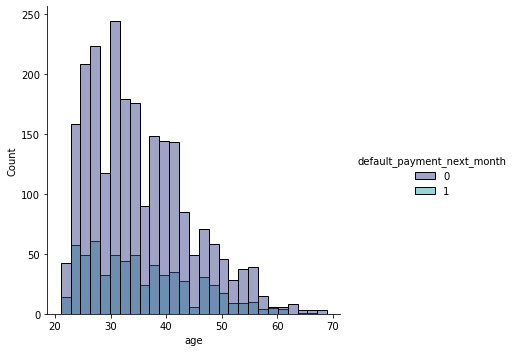

<Figure size 1080x360 with 0 Axes>

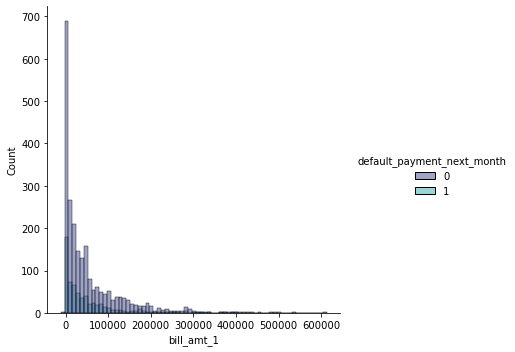

<Figure size 1080x360 with 0 Axes>

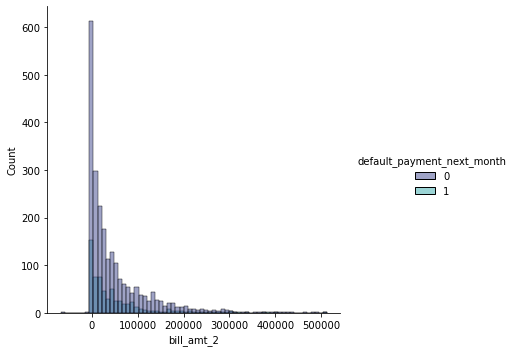

<Figure size 1080x360 with 0 Axes>

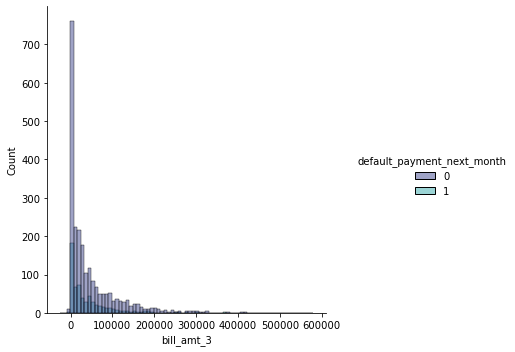

<Figure size 1080x360 with 0 Axes>

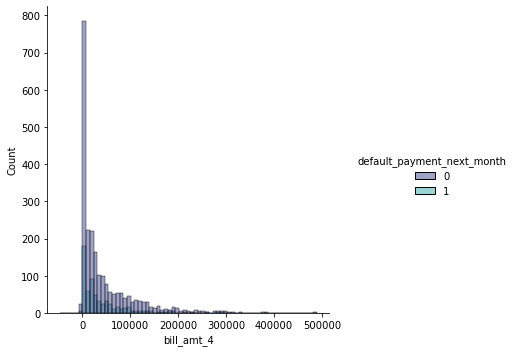

<Figure size 1080x360 with 0 Axes>

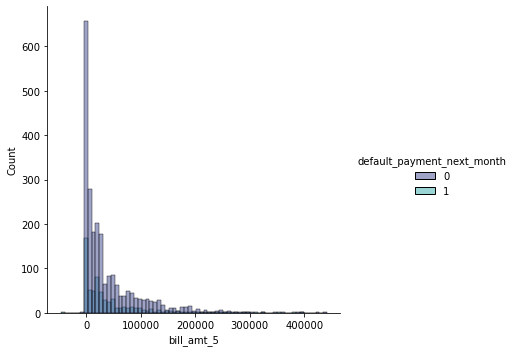

<Figure size 1080x360 with 0 Axes>

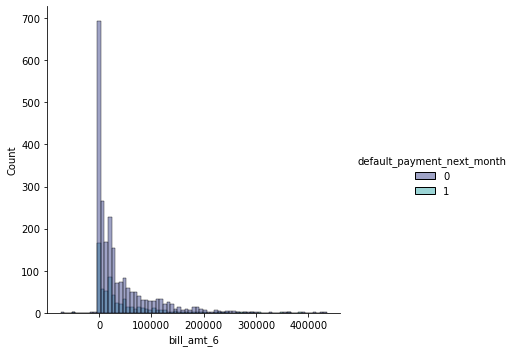

<Figure size 1080x360 with 0 Axes>

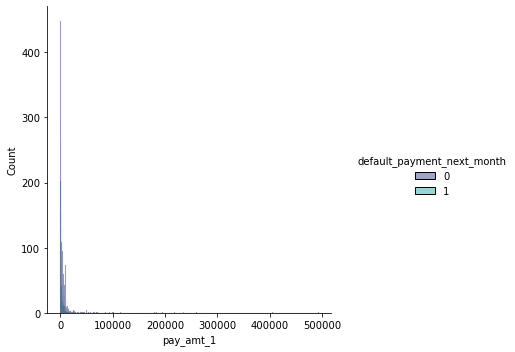

<Figure size 1080x360 with 0 Axes>

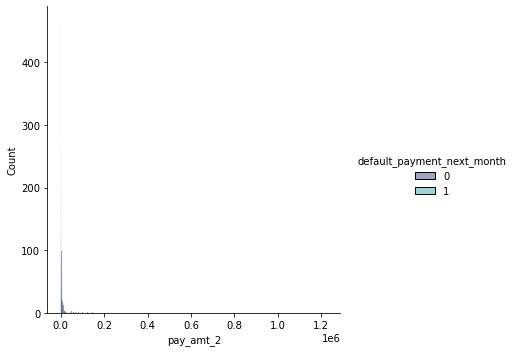

<Figure size 1080x360 with 0 Axes>

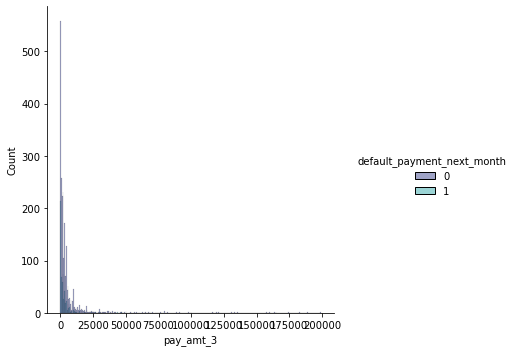

<Figure size 1080x360 with 0 Axes>

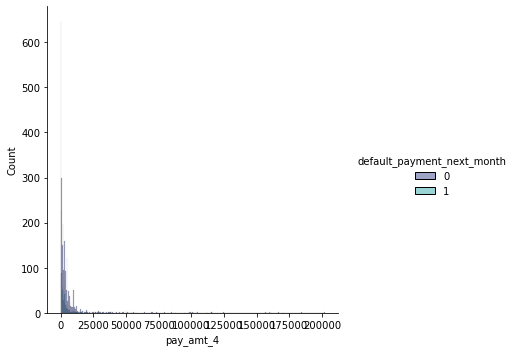

<Figure size 1080x360 with 0 Axes>

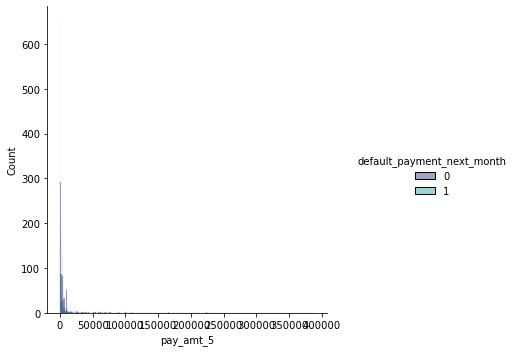

<Figure size 1080x360 with 0 Axes>

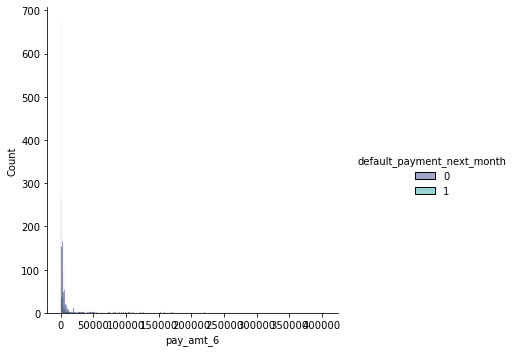

In [51]:
for col in numCols:
    plt.figure(figsize=(15,5))
    sns.displot(x=col,data=df, palette="mako", hue='default_payment_next_month')
    plt.show()

From these plots, we can see that the smaller the bill amount is, the higher the chances of the default payment. Other than that, the age distribution is concentrated below 50 years of age, but age doesn't have that much effect on the default payment. 

In [45]:
catCols = df[["sex","education_level","marital_status","pay_0","pay_2","pay_3","pay_4","pay_5","pay_6"]]
catCols

,sex,education_level,marital_status,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6
0,1,1,2,0,0,0,0,0,0
1,2,1,2,0,0,0,0,0,0
2,1,1,2,0,0,0,2,0,0
3,1,1,1,0,0,0,0,0,0
4,1,1,2,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
2960,2,2,1,-1,-1,-1,-1,-2,-1
2961,2,1,1,2,-1,-1,-1,-2,-1
2962,1,1,2,1,-1,-1,-1,-2,-2
2963,1,2,1,1,-1,-1,-2,-2,-1


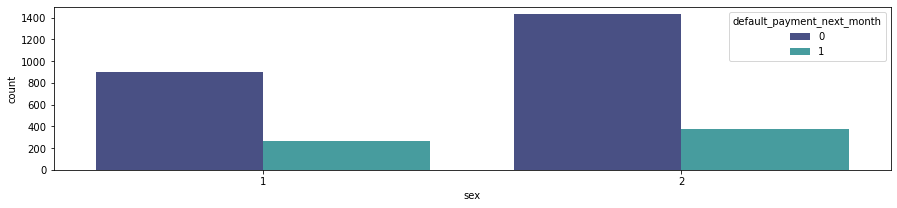

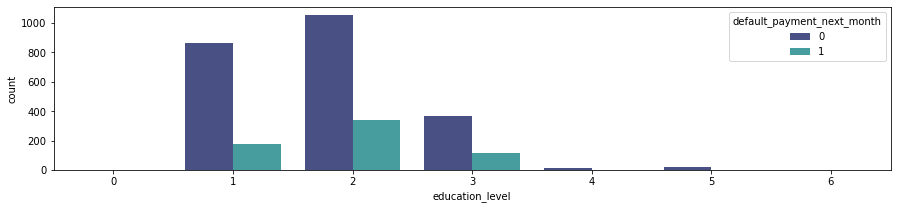

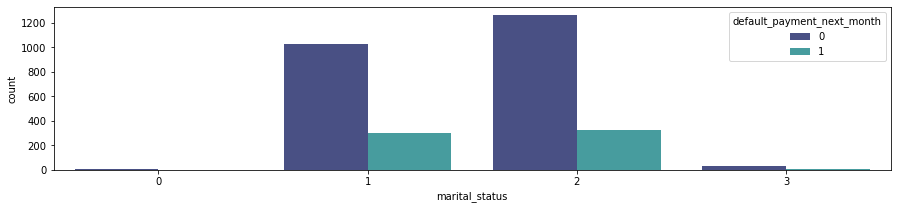

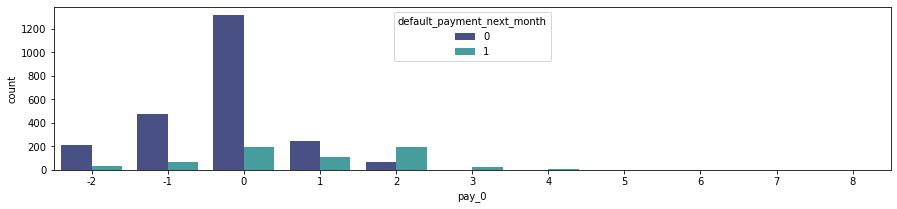

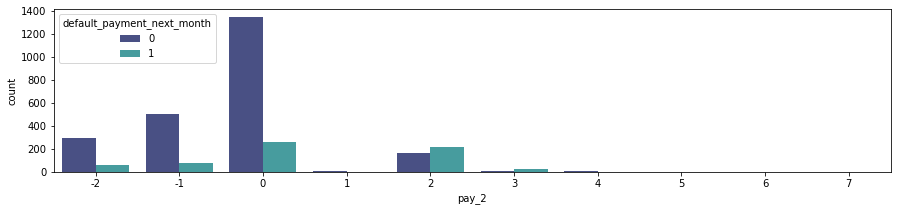

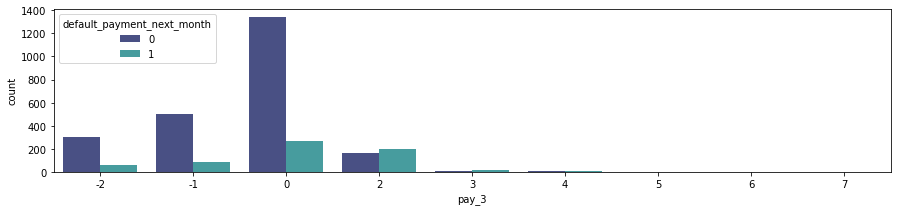

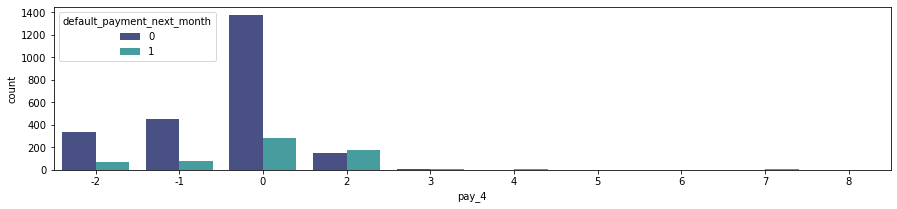

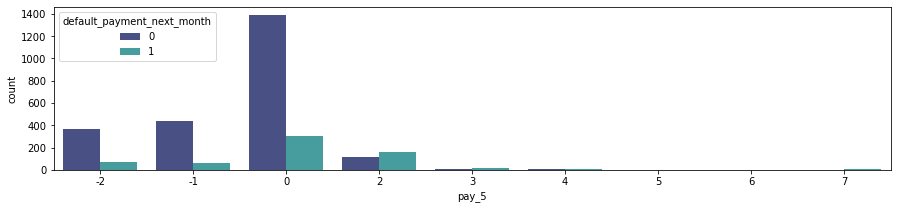

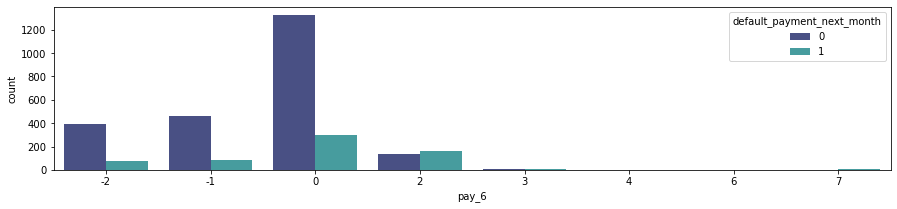

In [47]:
for col in catCols:
    plt.figure(figsize=(15,3))
    sns.countplot(x=col,data=df, palette="mako", hue="default_payment_next_month")
    plt.show()

From this bar plots we can see that sex and marital status don't have any effect on default payment for next month. Other than that, we can see those who graduated from university (2) tend to have default payment. Furthermore, we can see those who don't pay their bills for 2 months, will have default payment.

## Feature Selection

Using heatmap and Phi_K Correlation Analyzer to know which features have strong correlation with our target column, default_payment_next_month. Furthermore, I will also plot these features to gain more insight. 

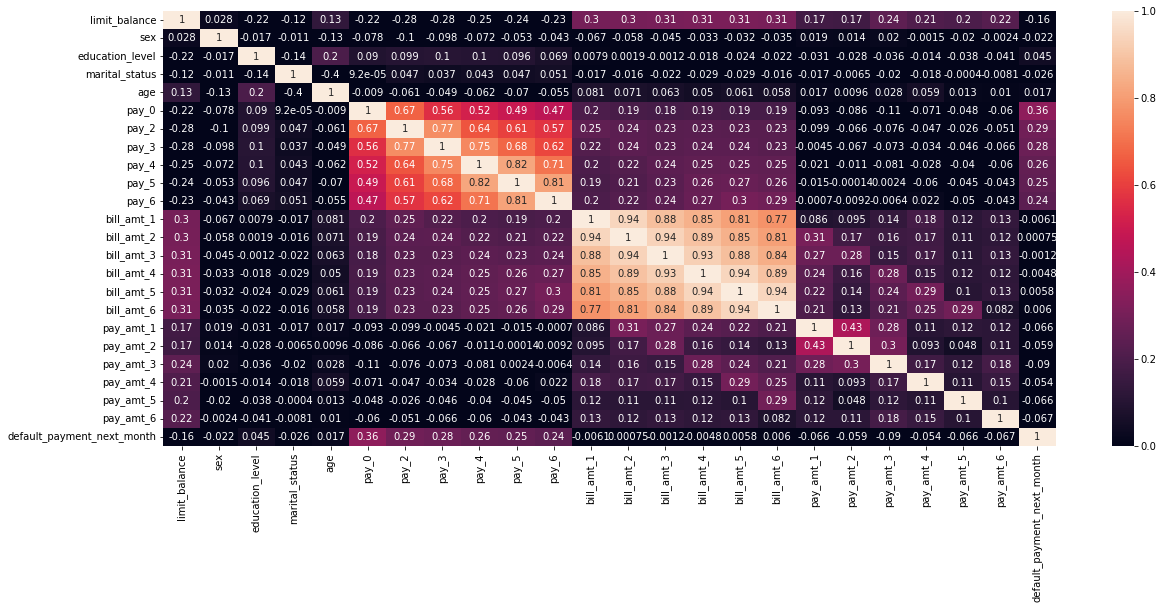

In [ ]:
corr = df.corr()

plt.figure(figsize=(20, 8))
sns.heatmap(corr, annot= True, vmin=0, vmax=1)
plt.show()

From this heatmap plot, we can see that the "pay" columns have the most correlation albeit small. Next I will use Phi_K Correlation Analyzer to see whether the correlation from heatmap is accurate. The reasoning behind why I chose this analyzer is:

1. The combined features of Phi_K form an advantage over existing coefficients.

2. It works consistently between categorical, ordinal and interval variables. 

3. It captures non-linear dependency. 

These all can be useful for the categorical features since they are not linear dependent with our target. 

interval columns not set, guessing: ['limit_balance', 'sex', 'education_level', 'marital_status', 'age', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6', 'default_payment_next_month']


<AxesSubplot:>

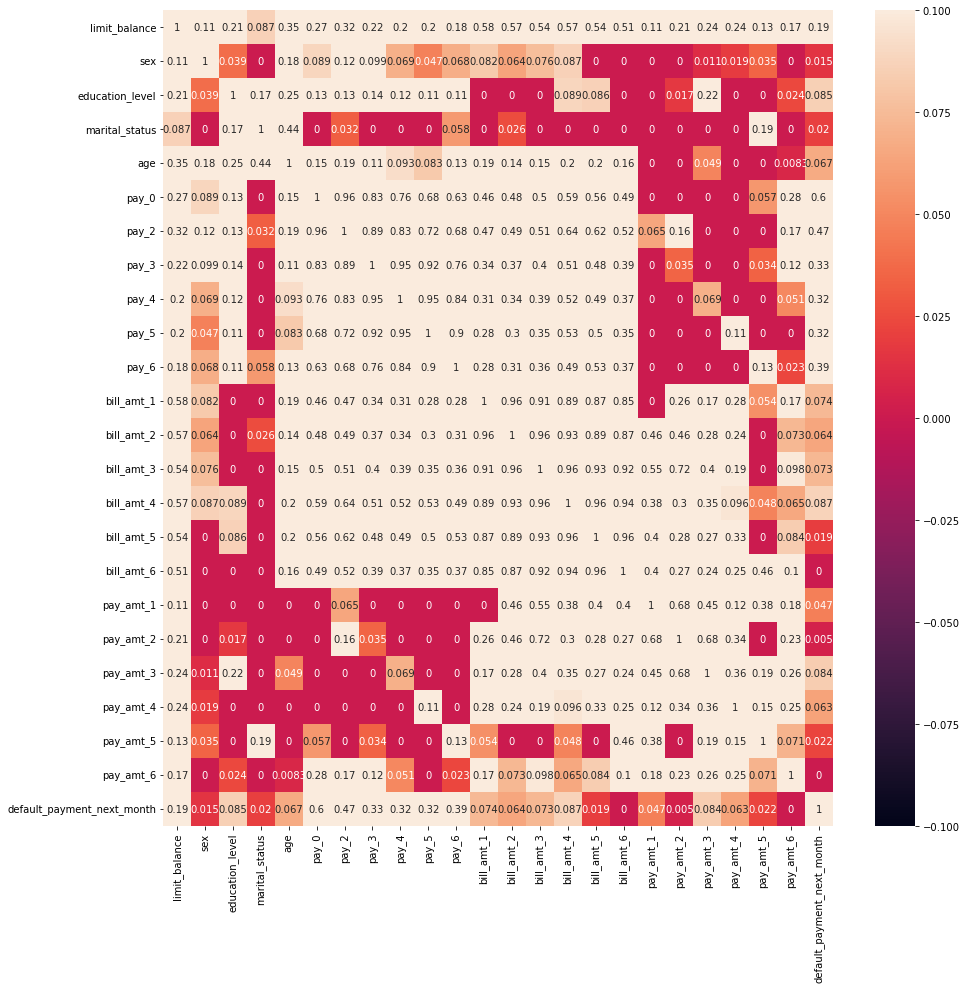

In [ ]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.phik_matrix(), vmin=0, vmax=0, annot=True)

From this output, we can see that it is true that the "pay" columns' coefficients are higher than others. I decided to choose these columns as the features for the modelling. But, to gain further insight as to what these columns are, as to the dataset, these are the explanation for the "pay" columns: 

Pay_6 : Repayment status in April, 2005 with the scale of -1 that indicates that the payment is duly paid, and 1-9 that indicates the late payments. 1 for 1 month of late payment and 9 for 9 months or above of late payments. 

Pay_5 : Repayment status in May, 2005

Pay_4 : Repayment status in June, 2005

Pay_3 : Repayment status in July, 2005

Pay_2 : Repayment status in August, 2005

Pay_0 : Repayment status in September, 2005

Since the column of Pay_0 is not in order, I will rename this column to pay_1

In [ ]:
df.rename(columns = {'pay_0':'pay_1'}, inplace = True)


<AxesSubplot:>

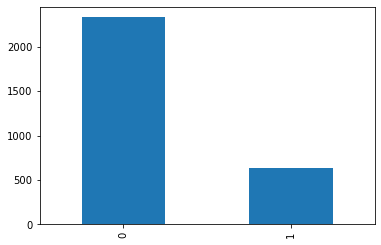

In [ ]:
df['default_payment_next_month'].value_counts().plot(kind='bar')


We can see that our target data is imbalanced, thus I will balance it during the preprocessing step.

## Data Preprocessing

Since I have chosen the features to be used for the model, I will create a new variable that will hold the value of said features.

In [ ]:
df1 = df[['pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'default_payment_next_month']]
df1.head()

,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,default_payment_next_month
0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0
2,0,0,0,2,0,0,0
3,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0


Since all of these columns are categorical and already encoded by the author, I will conduct test on the assumptions of the models. 

Logistic Regression and SVM Model Assumptions:

1. The target variable is binary
2. It assumes the entries to be independent of each other (no duplicates).
3. There is a linear relationship between the independent variable (features) and dependent variable (target).
4. It assumes that there is minimal or no multicollinearity among the independent variables (features).
5. It usually requires a large sample size to predict properly.

In [ ]:
df['default_payment_next_month'].unique()

array([0, 1], dtype=int64)

The target variable is indeed binary which consists of 0 and 1 with the type of integer. Next I will check the VIF score of the feature columns which indicates the multicolinearity of said features. 

In [ ]:
vif_test = df1[['pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']]
vif_data = pd.DataFrame()
vif_data["Feature"] = vif_test.columns

vif_data["VIF"] = [variance_inflation_factor(vif_test.values, i)
                          for i in range(len(vif_test.columns))]
  
print(vif_data)

  Feature       VIF
0   pay_1  1.838570
1   pay_2  3.114527
2   pay_3  3.399130
3   pay_4  4.080385
4   pay_5  4.805173
5   pay_6  3.176901


Since all of the features have small multicolinearity (below 5), it is concluded that the features are safe to conduct logistic regression and svm model upon. 

### Splitting the dataframe

#### Splitting dataframe for the model inference

This will be used later after I conduct the modelling.

In [ ]:
df_inf = df1.sample(15, random_state=19)
df2 = df1.drop(df_inf.index)
df2.reset_index(drop=True, inplace=True) # Resetting index for the dataframe
df_inf.reset_index(drop=True, inplace=True) # Resetting index for the inference dataframe 

#### Imbalanced Data Handling by Oversampling

By using sampling, I will conduct the balancing of the data, especially towards the "1" class.

#### Splitting dataframe between X (Independent Variables/Feautres) and Y (Dependent Variables/Our Target)

<AxesSubplot:>

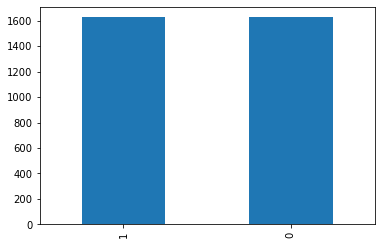

In [ ]:
X = df2

df_train, df_test = train_test_split(X, test_size=0.3, random_state=69)

train_0 = df_train[df_train['default_payment_next_month']==0]
train_1 = df_train[df_train['default_payment_next_month']==1].sample(len(train_0), replace=True)

df2_sampling = pd.concat([train_0,train_1])
df2_sampling = df2_sampling.sample(len(df2_sampling))

df2_sampling['default_payment_next_month'].value_counts().plot(kind='bar')


In [ ]:
X_train = df2_sampling.drop('default_payment_next_month', axis=1)
X_test = df_test.drop('default_payment_next_month', axis=1)

y_train = df2_sampling[['default_payment_next_month']]
y_test = df_test[['default_payment_next_month']]

I will not be conducting any outlier handlings due to the fact that the entries of the data are categorical

# Modelling

In this section I will conduct the modelling for the prediction of our target.

### Model Definition

In this subsection I will define the models that I will be using for the prediction which are: logistic regression, support vector machine, decision tree, random forest, K-nearest neighbors, naive bayes and AdaBoost.

In [ ]:
log_model = LogisticRegression()
svc_model = SVC()
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()
knn_model = KNeighborsClassifier()
nb_model = GaussianNB()
adaboost_model = AdaBoostClassifier(DecisionTreeClassifier(), algorithm="SAMME.R",random_state=19)

### Model Training

In this section I will use the training data that I have defined earlier and fit it to the models I have defined.

In [ ]:
for models in [log_model, svc_model, dt_model, rf_model, knn_model, nb_model, adaboost_model]:
    models.fit(X_train, y_train)

### Checking Cross Validation Score 

In this section, I will be checking the cross validation score of each model by looking at the mean and standard deviation through accuracy score.

In [ ]:
cv_log_model = cross_val_score(log_model, X_train, y_train, cv=3, scoring="accuracy")
cv_svc_model = cross_val_score(svc_model, X_train, y_train, cv=3, scoring="accuracy")
cv_dt_model = cross_val_score(dt_model, X_train, y_train, cv=3, scoring="accuracy")
cv_rf_model = cross_val_score(rf_model, X_train, y_train, cv=3, scoring="accuracy")
cv_knn_model = cross_val_score(knn_model, X_train, y_train, cv=3, scoring="accuracy")
cv_nb_model = cross_val_score(nb_model, X_train, y_train, cv=3, scoring="accuracy")
cv_adaboost_model = cross_val_score(adaboost_model, X_train, y_train, cv=3, scoring="accuracy")

In [ ]:
cvh=0 # cross validation highest. At this point it's not determined and thus I use 0.
for cv,name in zip([cv_log_model,cv_svc_model,cv_dt_model,cv_rf_model,cv_knn_model,cv_nb_model,cv_adaboost_model],
['log_model','svc_model','dt_model','rf_model','knn_model','nb_model','adaboost_model']):
    print(name)
    print('Accuracy - All - Cross Validation  : ', cv)
    print('Accuracy - Mean - Cross Validation : ', cv.mean())
    print('Accuracy - Std - Cross Validation  : ', cv.std())
    print('Accuracy - Range of Test-Set       : ', (cv.mean()-cv.std()) , '-', (cv.mean()+cv.std()))
    print('-'*50)
    if cv.mean()>cvh:
        cvh= cv.mean()
        nameh=name # nameh is the name of the model that has the highest cross validation score
    else:
        continue
print ('best model:', nameh)
print('cross-val mean:', cvh)

log_model
Accuracy - All - Cross Validation  :  [0.70664207 0.68357934 0.70940959]
Accuracy - Mean - Cross Validation :  0.6998769987699877
Accuracy - Std - Cross Validation  :  0.011579440580419872
Accuracy - Range of Test-Set       :  0.6882975581895678 - 0.7114564393504075
--------------------------------------------------
svc_model
Accuracy - All - Cross Validation  :  [0.71771218 0.71863469 0.72140221]
Accuracy - Mean - Cross Validation :  0.719249692496925
Accuracy - Std - Cross Validation  :  0.0015679641800715681
Accuracy - Range of Test-Set       :  0.7176817283168535 - 0.7208176566769966
--------------------------------------------------
dt_model
Accuracy - All - Cross Validation  :  [0.7297048  0.72509225 0.73708487]
Accuracy - Mean - Cross Validation :  0.7306273062730627
Accuracy - Std - Cross Validation  :  0.004939230751601782
Accuracy - Range of Test-Set       :  0.725688075521461 - 0.7355665370246645
--------------------------------------------------
rf_model
Accuracy 

The cross validation score points out that logistic regression is the best model for the prediction of our data. Thus, I will conduct hyperparameter tuning upon this model to gain more accuracy. 

### Hyperparameter Tuning for Adaboost

In [ ]:
ab_clf = AdaBoostClassifier(random_state=19)
parameters = {
    'n_estimators': [25, 50, 100, 200],
    'algorithm' : ['SAMME', 'SAMME.R']
} 
clf = GridSearchCV(ab_clf, parameters, cv=5, verbose=1)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=19),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'n_estimators': [25, 50, 100, 200]},
             verbose=1)

In [ ]:
clf.best_params_

{'algorithm': 'SAMME.R', 'n_estimators': 200}

From this best parameters ouput, we can see that the criterion of 


# Model Evaluation

## Confusion Matrix by Default Hyperparameters

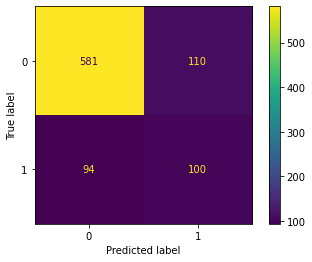

In [ ]:
plot_confusion_matrix(adaboost_model, X_test, y_test) 

Intepretation: the model with the default hyperparameters falsely predict 340 data (116 and 224) and correctly predict 1053 data (581 and 472).

## Model Evaluation of Adaboost with Default Hyperparameters

In [ ]:
adaboost_y_pred_train = adaboost_model.predict(X_train)
adaboost_y_pred_test = adaboost_model.predict(X_test)

print ("Training")
print(classification_report(y_train, adaboost_y_pred_train))
print("\n===========================\n")
print("Test")
print(classification_report(y_test,adaboost_y_pred_test))


Training
              precision    recall  f1-score   support

           0       0.73      0.86      0.79      1626
           1       0.83      0.68      0.75      1626

    accuracy                           0.77      3252
   macro avg       0.78      0.77      0.77      3252
weighted avg       0.78      0.77      0.77      3252



Test
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       691
           1       0.48      0.52      0.50       194

    accuracy                           0.77       885
   macro avg       0.67      0.68      0.67       885
weighted avg       0.78      0.77      0.77       885



## Confusion Matrix by Tuned Hyperparameters

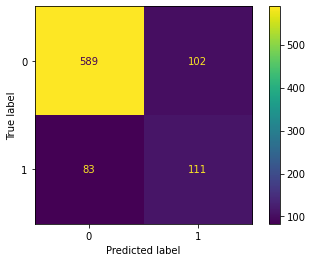

In [ ]:
plot_confusion_matrix(clf, X_test, y_test) 

## Model Evaluation of Adaboost with Tuned Hyperparameters

In [ ]:
adaboost_y_pred_train_best = clf.predict(X_train)
adaboost_y_pred_test_best = clf.predict(X_test)

print ("Training")
print(classification_report(y_train, adaboost_y_pred_train_best))
print("\n===========================\n")
print("Testing")
print(classification_report(y_test,adaboost_y_pred_test_best))


Training
              precision    recall  f1-score   support

           0       0.67      0.87      0.75      1626
           1       0.81      0.57      0.67      1626

    accuracy                           0.72      3252
   macro avg       0.74      0.72      0.71      3252
weighted avg       0.74      0.72      0.71      3252



Testing
              precision    recall  f1-score   support

           0       0.88      0.85      0.86       691
           1       0.52      0.57      0.55       194

    accuracy                           0.79       885
   macro avg       0.70      0.71      0.70       885
weighted avg       0.80      0.79      0.79       885



Intepretation: by looking at the precision and recall score in testing data, the model has low precision in predicting the "1"/True/default payment which is something that is desired. 

It is also worth mentioning that this model is highly underfitted since the f1-score which is the combination of precision and recall score of the testing is significantly higher.

From these outputs we can see that the evaluation of the model on the test data by using the tuned hyperparameters albeit almost the same, performs slightly worse than that of the default.

# Model Inference

In this section, I will be conducting the inference of our model by using the default hyperparameters since the evaluation score for this is no

In [ ]:
df_inf_x = df_inf[["pay_1", "pay_2", "pay_3", "pay_4", "pay_5", "pay_6"]]
df_inf_x

,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,-1,-1,-2,-2,-2,-2
5,-1,-1,2,-1,0,-1
6,-2,-1,-1,-2,-2,-2
7,1,2,0,0,0,0
8,0,0,0,2,2,0
9,0,0,0,0,-2,-1


### Model Inference with Default Hyperparameters

In [ ]:
adaboost_y_pred_inf= adaboost_model.predict(df_inf_x)
adaboost_y_pred_inf_df= pd.DataFrame(adaboost_y_pred_inf, columns = ["Random Forest Prediction"])
pd.concat([df_inf, adaboost_y_pred_inf_df], axis=1)

,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,default_payment_next_month,Random Forest Prediction
0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0
4,-1,-1,-2,-2,-2,-2,0,0
5,-1,-1,2,-1,0,-1,0,0
6,-2,-1,-1,-2,-2,-2,0,0
7,1,2,0,0,0,0,0,1
8,0,0,0,2,2,0,0,1
9,0,0,0,0,-2,-1,0,0


### Model Inference with Tuned Hyperparameters

In [ ]:
adaboost_y_pred_inf_tuned= clf.predict(df_inf_x)
adaboost_y_pred_inf_df_tuned= pd.DataFrame(adaboost_y_pred_inf_tuned, columns = ["Random Forest Prediction"])
pd.concat([df_inf, adaboost_y_pred_inf_df_tuned], axis=1)

,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,default_payment_next_month,Random Forest Prediction
0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0
4,-1,-1,-2,-2,-2,-2,0,0
5,-1,-1,2,-1,0,-1,0,1
6,-2,-1,-1,-2,-2,-2,0,0
7,1,2,0,0,0,0,0,1
8,0,0,0,2,2,0,0,1
9,0,0,0,0,-2,-1,0,0


By looking at the result of the prediction, we can see that our model is quite weak at predicting the "True"/1 default payment. 

# Conclusion and Further Improvement Studies

From the modelling process that I have conducted, these are the conclusions that I have drawn:

1. Although the adaboost is the model with the highest cross validation model, we can see that it still lacks the accuracy of prediction that the data needs.

2. This can be dangerous since the model could predict the ones who have default payment as the ones who have duly payment. 

3. This also can happen due to the fact that the data is lacking entries. Since the more entries in data, the better.

4. From this, further improvements can be conducted by adding more features to the model and/or tuning the hyperparameters of other models.

5. The other model that can be further analyze (those which have nearly the same cross validation score) is random forest model. 

# Conceptual Problems

1. What is the criterion parameter function in the decision tree? Explain one criterion that you understand!

Decision tree model needs the criterion parameter to separate attributes into branches. This parameter determines how the impurity of a split will be measured. The default value is “gini” but the “entropy” is also can be used as a metric for impurity.

Gini impurity is used to calculate the purity of the split at nodes of the decision tress. The gini impurity varies between 0 - 0.5 where the 0 depicts that the node is pure and all of the instances are of same class. Gini impurity has more advantage computationally than entropy since entropy uses logarithmic calculation and this could lead up in taking more time to process.

source : https://medium.com/geekculture/criterion-used-in-constructing-decision-tree-c89b7339600f

2. What is the function of pruning in Tree Model?

Pruning is the process of eliminating weight connections from a network to speed up inference and reduce model storage size. Decision trees and neural networks, in general, are overparameterized. Pruning a network entails deleting unneeded parameters from an overly parameterized network.

source : https://analyticsindiamag.com/what-is-pruning-in-tree-based-ml-models-and-why-is-it-done/#:~:text=check%20out%20here.-,About%20pruning,from%20an%20overly%20parameterized%20network.

3. How to choose the optimal "K" value in KNN?

Firstly, we need to compute distances between test points and trained labels points, yet when we update distance metrics with every iteration is computationally expensive. For this reason, we need to initialize a random K value to start, but keep in mind that by choosing a small value of K might lead to unstable decision boundaries. 

Another method is to use `elbow method`. For each value of K, we are calculating WCSS (Within-Cluster Sum of Square).  When we plot the WCSS with the K value, the plot looks like an Elbow. As the number of clusters increases, the WCSS value will start to decrease. WCSS value is largest when K = 1. When we analyze the graph we can see that the graph will rapidly change at a point and thus creating an elbow shape. From this point, the graph starts to move almost parallel to the X-axis. The K value corresponding to this point is the optimal K value or an optimal number of clusters.

source: https://www.analyticsvidhya.com/blog/2021/01/in-depth-intuition-of-k-means-clustering-algorithm-in-machine-learning/#:~:text=Elbow%20Method,-In%20the%20Elbow&text=WCSS%20is%20the%20sum%20of,is%20largest%20when%20K%20%3D%201.


4. Explain what you know about `Cross Validation`!

Cross validation is a statistical method of resampling and comparing learning algorithms by dividing data into two segments where one is used to train a model and the other used to validate the model. It is mainly used in settings where the goal is prediction and one wants to estimate how accurately a predictive model will perform in practice.


source: Refaeilzadeh, P., Tang, L., Liu, H. (2009). Cross-Validation. In: LIU, L., ÖZSU, M.T. (eds) Encyclopedia of Database Systems. Springer, Boston, MA. https://doi.org/10.1007/978-0-387-39940-9_565




5. Explain what you know about `Accuracy, Precision, Recall, F1 Score`!

Accuracy: This evaluation score is used when the data is balanced. The bigger the accuracy score is (nearing 1), the better the model is. But, we have to compare the training accuracy score and the testing accuracy score. The two scores need to be at least almost the same to know whether the model is fit to predict future data or not.

Precision: The precision score is how precise the model in predicting the classification of the features, if we want to focus on the false positive (where the model falsely predict the class to be positive)

Recall: The recall score is how sensitive the model in predicting the target by the categories, if the recall score of the class is lower than the precision score, then the model most definitely will not be able to predict future entries of data. This score is also focused on the false negative (where the model falsely predict the class to be negative)

F1 Score: F1 score is the average or combination of precision and recall.